# COMPETITION-GROUP 11


The dataset is about an Insurance company that has provided Health Insurance to its customers.
The model is to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.This is a classification problem.


In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Annual Premium, sourcing channel) etc.


Reference:https://www.kaggle.com/anmolkumar/vehicle-insurance-eda-lgbm-vs-catboost-85-83/notebook

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
## Reading the data set to python environmnet

In [3]:
data=pd.read_csv('vehicle data.csv')

In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


# Basic details of the dataset

In [5]:
data.shape

(381109, 12)

Dataset has 381109 features and 12 observation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [7]:
data.describe()  ## statistical summary

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Data is clean with no null values

In [9]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
data.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

# 2 Preprocessing

Missing value handling

In [11]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Checking for outliers

In [12]:
numcols=data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


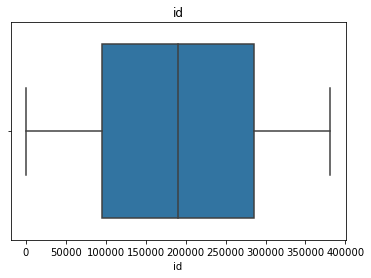

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


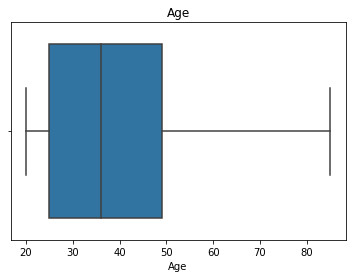

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


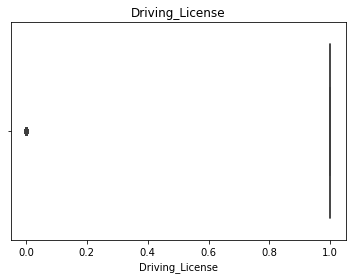

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


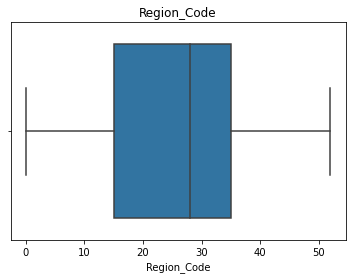

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


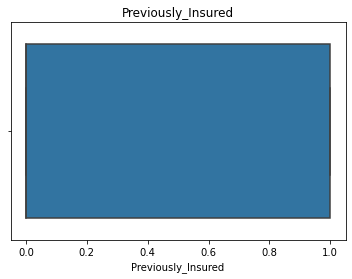

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


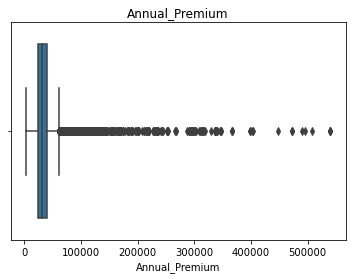

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


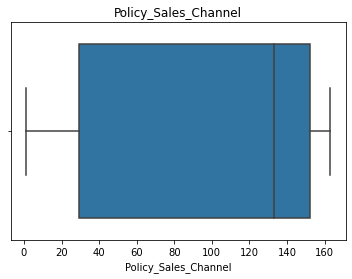

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


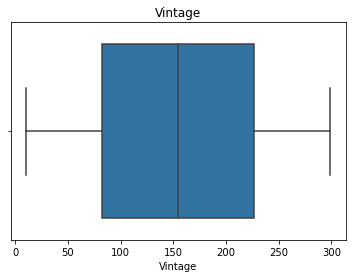

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


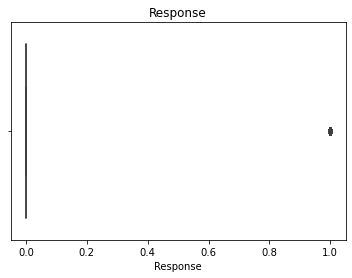

In [13]:
for x in numcols:
    sns.boxplot(data[x])
    plt.title(x)
    plt.show()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
Q1=np.percentile(data['Annual_Premium'],25,interpolation='midpoint')
Q2=np.percentile(data['Annual_Premium'],50,interpolation='midpoint')
Q3=np.percentile(data['Annual_Premium'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)


24405.0
31669.0
39400.0


In [16]:
IQR=Q3-Q1

In [17]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

1912.5
61892.5


In [18]:
data['Annual_Premium'][data['Annual_Premium']>up_limit] = up_limit
data['Annual_Premium'][data['Annual_Premium']<low_limit] = low_limit

<AxesSubplot:xlabel='Annual_Premium'>

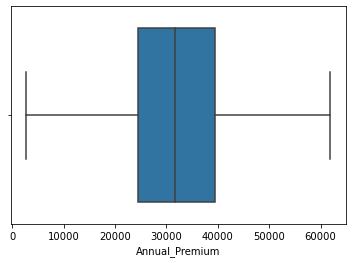

In [19]:
sns.boxplot(data['Annual_Premium'],orient='h')

Outliers are removed

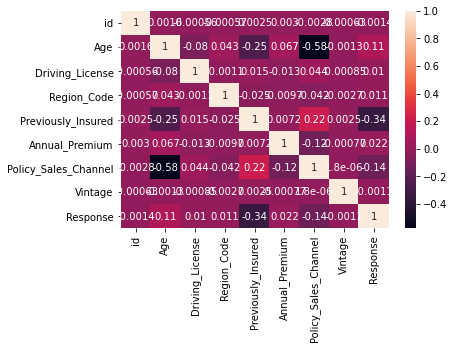

In [20]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

# Encoding

In [21]:
def get_uniques(data, columns):
    return {column: list(data[column].unique()) for column in columns}

In [22]:
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [23]:
get_uniques(data, categorical_features)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

Interpretation Here these are the columns contain the nominal data and 2 columns contain 2 unique objects and 1 column contain three unique object.
Since the columns 'Gender' and 'Vehicle_Damage' can encoded using binary encoding the columns contains only two distinct objects.
The other column of 'Vehicle_Age' has 3 distinct object and using binary encoding has limitations we use ordinal encoding which can be when data contains more than 2 categorical values.

In [24]:
binary_features = ['Gender', 'Vehicle_Damage']

ordinal_features = ['Vehicle_Age']

In [25]:
#binary encoding
def binary_encode(data, column, positive_label):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == positive_label else 0)
    return data

In [26]:
data = binary_encode(data, 'Gender', 'Male')
data = binary_encode(data, 'Vehicle_Damage', 'Yes')

In [27]:
## ordianl encoding
def ordinal_encode(data, column, ordering):
    data = data.copy()
    data[column] = data[column].apply(lambda x: ordering.index(x))
    return data

In [28]:
age_ordering = ['< 1 Year', '1-2 Year', '> 2 Years']
data = ordinal_encode(data, 'Vehicle_Age', age_ordering)

In [29]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454.0,26,217,1
1,2,1,76,1,3,0,1,0,33536.0,26,183,0
2,3,1,47,1,28,0,2,1,38294.0,26,27,1
3,4,1,21,1,11,1,0,0,28619.0,152,203,0
4,5,0,29,1,41,1,0,0,27496.0,152,39,0


Interpretation After deploying the encoding we can see the categorical varibles are now in distinct unique values for each columns.

Spliting Variable into Dependent variable and independent Variables.
Independent variables are id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage.
The Dependent Varible is Response.

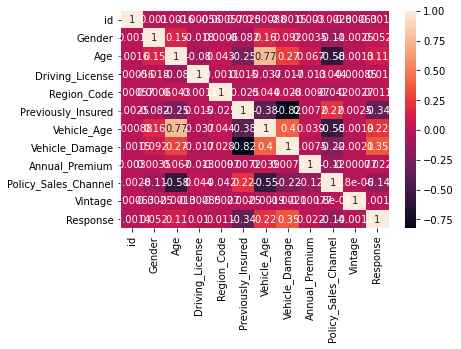

In [30]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

# Scaling

In [31]:
from sklearn import preprocessing

min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
data[['Annual_Premium']] = min_max.fit_transform(data[['Annual_Premium']])

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,0.638245,26,217,1
1,2,1,76,1,3,0,1,0,0.521510,26,183,0
2,3,1,47,1,28,0,2,1,0.601797,26,27,1
3,4,1,21,1,11,1,0,0,0.438540,152,203,0
4,5,0,29,1,41,1,0,0,0.419591,152,39,0


In [32]:
X=data.drop(['id','Response'],axis=1)
Y=data['Response']
 

In [33]:
#train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42) 
X_train.shape,X_test.shape

((266776, 10), (114333, 10))

# Exploratory Data Analysis


### Histogram for various variables over counts.

In [34]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,0.638245,26,217,1
1,2,1,76,1,3,0,1,0,0.521510,26,183,0
2,3,1,47,1,28,0,2,1,0.601797,26,27,1
3,4,1,21,1,11,1,0,0,0.438540,152,203,0
4,5,0,29,1,41,1,0,0,0.419591,152,39,0


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

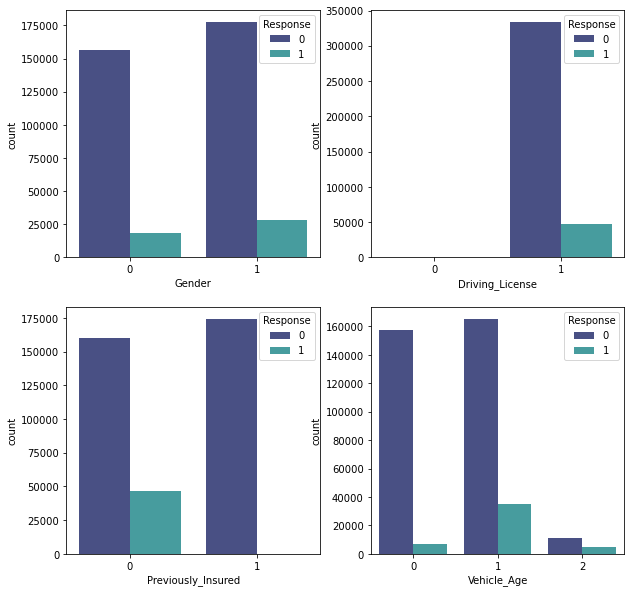

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=data,palette="mako")

Interpretation
When speaking of response variable, 0 represents that the vehicle onwer are willing to buy the insurance for vehicle and so 1 for those who are not willing to buy a insurance.
The count histogram for 'Gender' variable indicates that the more onwers of vehicles are male and also male onwers have more tendency to buy a insurance for thier vehicle.
The histogram for 'Driving_lisence' indicates that those who have license and almost 90% of them are willing to buy a insurance. and almost 50000 of onwers those who have license are not willing to buy insurance. And some of the onwers who doesn't have license are also willing buy a insurance.
The histogram for 'Previously_Insured' indicates that the almost 75% of the onwers those who hasn't previously insurured are now willing to take new insurance polices and those who have previously insured the vehicle are still going the same way.
The histogram for 'Vehicle_age' deplicts that vehicle data more vehicles has age between 1 and 2 years and only less vehicle has age greater than 2. Asusally the most of all new vehicle onwers are villing to take a insurance when comparing to the others,eventually those who are willing to buy insurance in still slightly high for the 2nd group since this group has more no of onwers than any other groups.

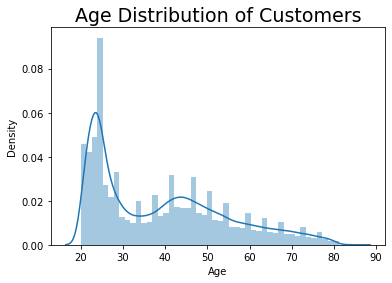

In [36]:
sns.distplot(data.Age)
plt.title('Age Distribution of Customers',fontsize=19)
plt.show()

Conclusion

Firstly the distribution is multimodal. And technically speaking this is a positively or right skewed data. Already we know that the mean of 'Age' is aproximately 38 and median of the 'Age' is 36 and while analysing the above plot that we can say the mode will lies inbetween the 23 and 30. So while comparing these value also (that is mode < median < mean) the data is positively skewed and most of all values is lies between 20 and 50, which mean most of all onwers age is between this 20 and 50.

Scatter plot between Age and Annual Premium¶

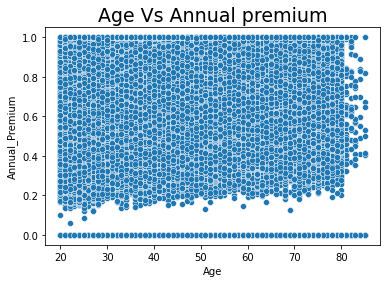

In [37]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])
plt.title('Age Vs Annual premium',fontsize=19)
plt.show()

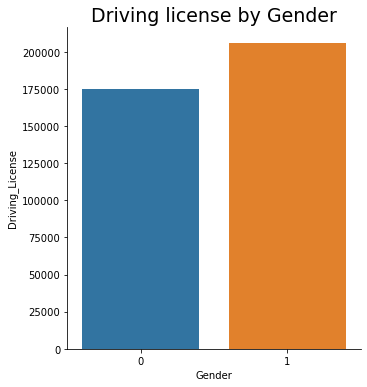

In [38]:
#Plot Of Driving Licence By Gender
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");
plt.title('Driving license by Gender',fontsize=19)
plt.show()

Conclusion

We can conclude that the from those who have are between 20 to 80 equaly prefers for the insuranc which has annual premium value is less than 100000 and for those who prefer the insurance has premium value greater than 200000 will exponential decreasing from age 20 to 80 and more.

Categorical Plot for Gender v/s Driving License.

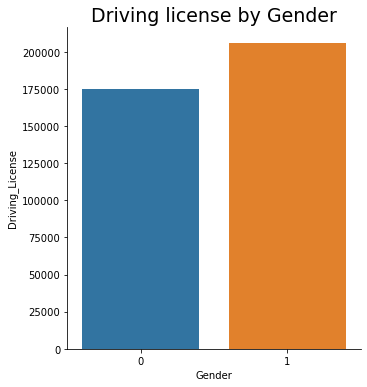

In [39]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");
plt.title('Driving license by Gender',fontsize=19)
plt.show()

Conclusion

In Female Catogory Around 175000 People Have Driving Licence. And, More Than 2Lakh Males Have Driving Licence

Plotting Histogram Of Each Column In The Dataset¶

<function matplotlib.pyplot.show(close=None, block=None)>

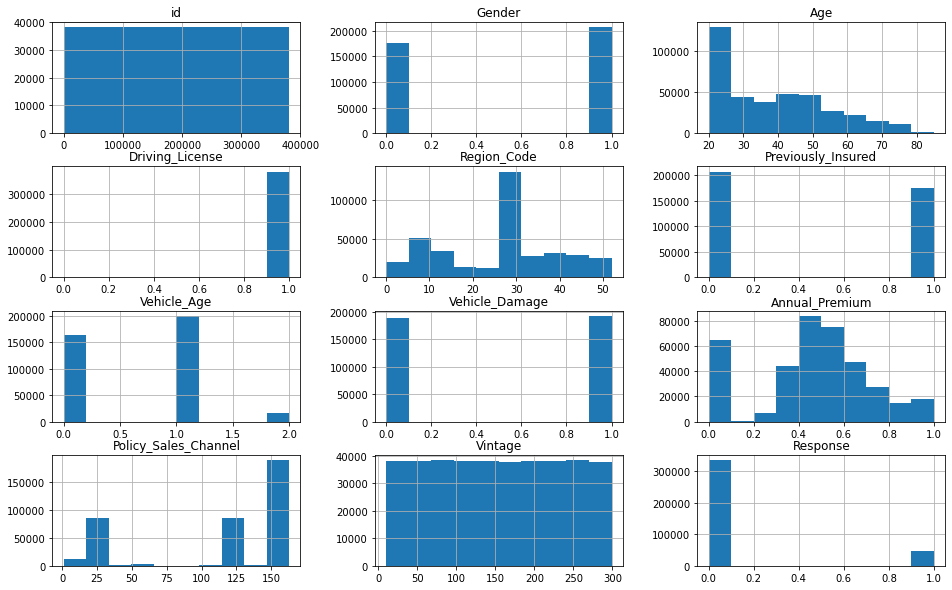

In [40]:
data.hist(figsize=(16,10))
plt.show

Since some of the variables are descibed deeply earlier and other histograms for id, vintage are completely meaning less if interpreting using the respective hist of those variables.

Plotting Count Plot Of Variable Vehicle Age With Respect to Responce

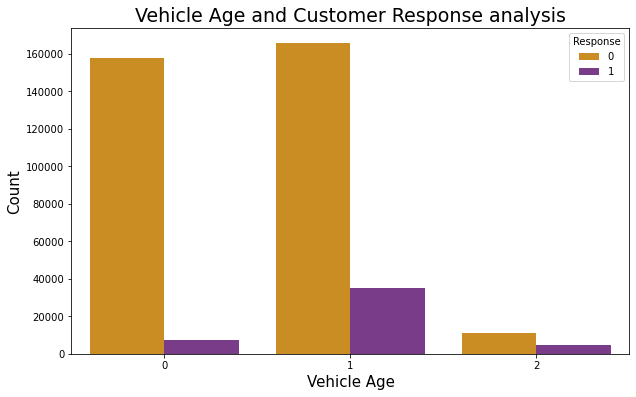

In [41]:
plt.figure(figsize = (10,6) )
sns.countplot(data =data, x = 'Vehicle_Age', hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

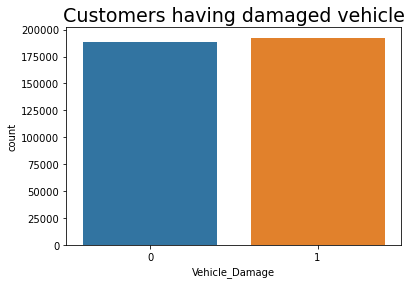

In [42]:
#Customer Having Damaged Vehicle
plt.title('Customers having damaged vehicle',fontsize=19)
sns.countplot(data.Vehicle_Damage)
plt.show()

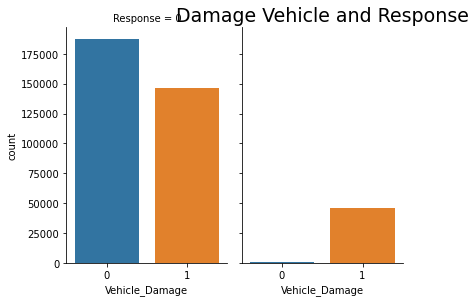

In [43]:
#Damage Vehicle and Response
df=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=df, kind="bar",height=4, aspect=.7);
plt.title('Damage Vehicle and Response', fontsize = 19)
plt.show()

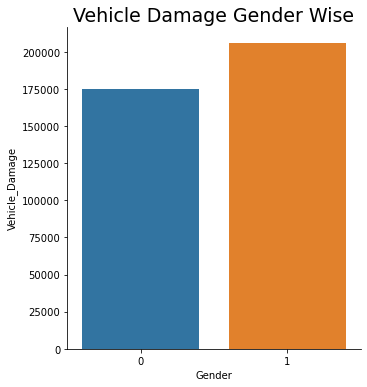

In [44]:
# Plot Of Vehicle Damage Gender Wise
df2=data.groupby(['Gender'])['Vehicle_Damage'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Vehicle_Damage",data=df2, kind="bar");
plt.title('Vehicle Damage Gender Wise', fontsize = 19)
plt.show()

Conclusion

Male Having Damaged Vehicle is More than Female's

Function For Percentage Value.

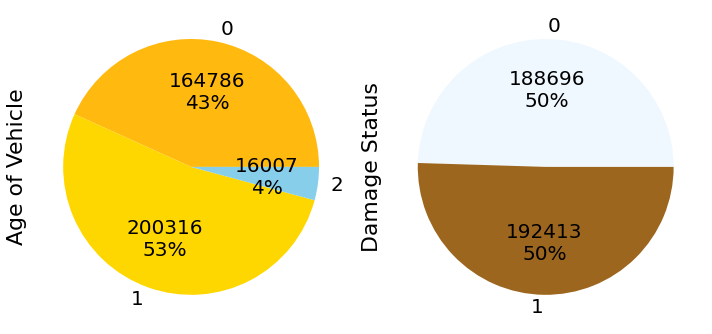

In [45]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

#Plotting Some Pie Charts about Age Of Vehicle , Damage Status
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

data.groupby('Vehicle_Age').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['#FFB90F', 'gold', 'skyblue'], ax=ax1)
data.groupby('Vehicle_Damage').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['#F0F8FF', '#9C661F'], ax=ax2)
ax1.set_ylabel('Age of Vehicle', size=22)
ax2.set_ylabel('Damage Status', size=22)
plt.tight_layout()
plt.show()

Interpretation As we already mentioned that most of vehicles in this data has age between 1 and 2 years. So, now we can clearly validate the statement using the respective percentage that 53% of vehicles age in the data between 1 and 2 years and 43% of vehcles age in this data less than 1 year and only 4% of vehicles have age greater than 3.

The second pie chart states that the vehicles has damaged and vehicles doesn't have any damages is almost equal. but in number vehicle with no damges are slighly high.

Plot A Graph About People who have Vehicle Insurance Already¶

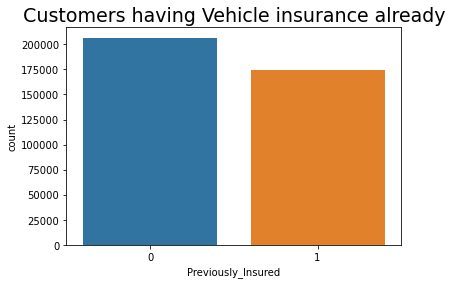

In [46]:
plt.title('Customers having Vehicle insurance already',fontsize=19)
sns.countplot(data.Previously_Insured)
plt.show()

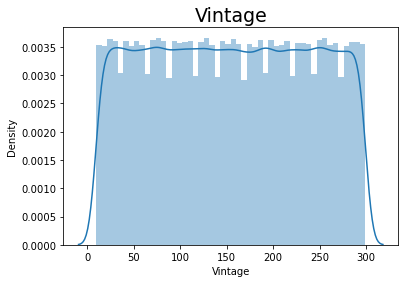

In [47]:
#Plot A Graph About Vintage
sns.distplot(data.Vintage)
plt.title('Vintage',fontsize=19)
plt.show()

# Data Modelling and Evaluation


In [48]:
X=data.drop(['id','Response'],axis=1)
Y=data['Response']
 

In [49]:
#train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42) 
X_train.shape,X_test.shape

((266776, 10), (114333, 10))

In [50]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Modelling

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [52]:
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
y_pred = logit_model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [54]:
print('Accuracy is  :',accuracy_score(Y_test,y_pred))
print('precision is  :',precision_score(Y_test,y_pred))
print('Recall is  :',recall_score(Y_test,y_pred))
print('f1 score :',f1_score(Y_test,y_pred))

Accuracy is  : 0.8758888509879037
precision is  : 0.2636363636363636
Recall is  : 0.0020512095062950914
f1 score : 0.004070746771476699


In [55]:
confusion_matrix(Y_test,y_pred)

array([[100114,     81],
       [ 14109,     29]], dtype=int64)

In [56]:
def matrix(model,X_train,Y_train,X_test,Y_test):
    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,Y_train) 
matrix(model_DT,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.9998463130116653 f1:0.9993702287144985
test score: accuracy:0.8232356362554993 f1:0.2996742671009772


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

In [59]:
print('Accuracy is  :',accuracy_score(Y_test,y_pred))
print('precision is  :',precision_score(Y_test,y_pred))
print('Recall is  :',recall_score(Y_test,y_pred))
print('f1 score :',f1_score(Y_test,y_pred))

Accuracy is  : 0.8664952375954449
precision is  : 0.375936535918907
Recall is  : 0.1206677040599802
f1 score : 0.18269436710216322


In [60]:
confusion_matrix(Y_test,y_pred)

array([[97363,  2832],
       [12432,  1706]], dtype=int64)

# model fine tuning

In [61]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [62]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [63]:
rft.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [64]:
y_pred=rft.predict(X_test)
f1_score(Y_test,y_pred)

0.0

Achieved 87.01% Accuracy in predicting the response of customers for the vehicle insurance